# Load Necessary Libraries

In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc

In [207]:
path = '/content/dataset.csv'

df = pd.read_csv(path)

# 1. Data Overview

In [208]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [209]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [211]:
df.shape

(891, 12)

In [212]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 2. Data Preprocessing

In [213]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [214]:
df.drop(['Cabin', 'Name', 'Ticket'], axis=1, inplace=True)

In [215]:
df.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Embarked']

In [216]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [217]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [218]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [219]:
sex_mapping = {'male': 1, 'female': 0}
df['Sex'] = df['Sex'].map(sex_mapping).astype(int)

In [220]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [221]:
embarked_mapping = {'S': 0, 'C': 1, 'Q': 2}
df['Embarked'] = df['Embarked'].map(embarked_mapping).astype(int)

In [222]:
df['Embarked'].value_counts()

,count
Embarked,
0,646
1,168
2,77


In [223]:
result = df.groupby('Pclass').agg(
    male=('Sex', lambda x: (x == 1).sum()),
    female=('Sex', lambda x: (x == 0).sum()),
    embarked=('Embarked', 'count')
).reset_index()

print(result)

   Pclass  male  female  embarked
0       1   122      94       216
1       2   108      76       184
2       3   347     144       491


# 3. Feature Engineering

In [224]:
result = df.groupby('Pclass').agg(
    male=('Sex', lambda x: (x == 1).sum()),
    male_survived=('Survived', lambda x: ((x == 1) & (df['Sex'] == 1)).sum()),
    female=('Sex', lambda x: (x == 0).sum()),
    female_survived=('Survived', lambda x: ((x == 1) & (df['Sex'] == 0)).sum()),
    embarked=('Embarked', 'count'),
    survived_embarked=('Survived', lambda x: (x == 1).sum())
).reset_index()

print(result)

   Pclass  male  male_survived  female  female_survived  embarked  \
0       1   122             45      94               91       216   
1       2   108             17      76               70       184   
2       3   347             47     144               72       491   

   survived_embarked  
0                136  
1                 87  
2                119  


In [225]:
df['FamilySize'] = df['SibSp'] + df['Parch']
df['IsAlone'] = (df['FamilySize'] == 0).astype(int)

In [226]:
df.drop(['SibSp', 'Parch'], axis=1, inplace=True)

In [227]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,IsAlone
0,1,0,3,1,22.0,7.2500,0,1,0
1,2,1,1,0,38.0,71.2833,1,1,0
2,3,1,3,0,26.0,7.9250,0,0,1
3,4,1,1,0,35.0,53.1000,0,1,0
4,5,0,3,1,35.0,8.0500,0,0,1


# 4. Exploratory Data Analysis

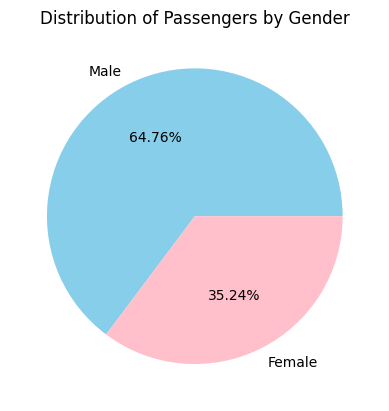

In [228]:
sex_counts = df['Sex'].value_counts()
labels = ['Male', 'Female']

plt.pie(sex_counts, labels=labels, autopct='%1.2f%%', colors=['skyblue', 'pink'])
plt.title("Distribution of Passengers by Gender")
plt.show()

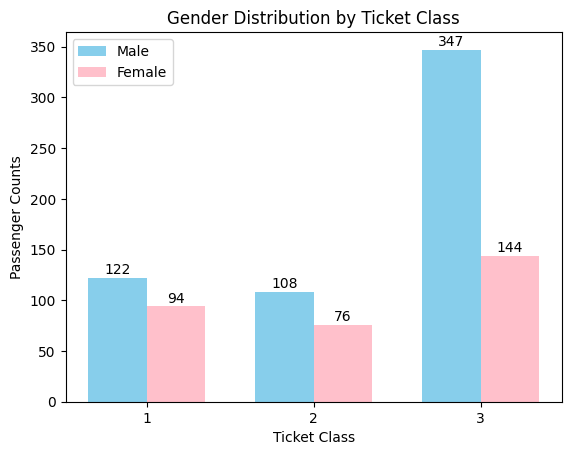

In [229]:
bar_width = 0.35
x_indices = np.arange(len(result['Pclass']))

male_bars = plt.bar(x_indices, result['male'], width=bar_width, label='Male', color='skyblue')
female_bars = plt.bar(x_indices + bar_width, result['female'], width=bar_width, label='Female', color='pink')

plt.xlabel("Ticket Class")
plt.ylabel("Passenger Counts")
plt.title("Gender Distribution by Ticket Class")
plt.xticks(x_indices + bar_width / 2, result['Pclass'])
plt.legend()

for bars in [male_bars, female_bars]:
    for bar in bars:
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() + 1,
            str(int(bar.get_height())),
            ha='center', va='bottom', color='black'
        )

plt.show()

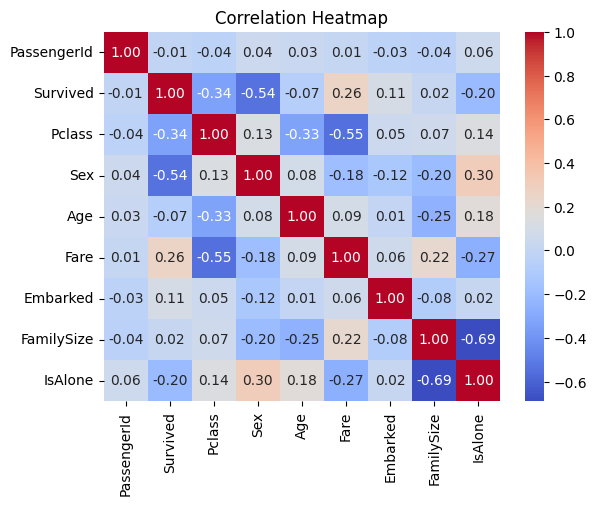

In [230]:
corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

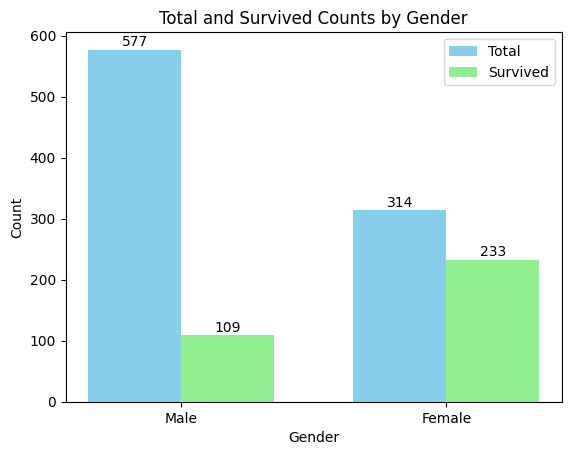

In [231]:
summary = {
    'total_male': (df['Sex'] == 1).sum(),
    'male_survived': ((df['Sex'] == 1) & (df['Survived'] == 1)).sum(),
    'total_female': (df['Sex'] == 0).sum(),
    'female_survived': ((df['Sex'] == 0) & (df['Survived'] == 1)).sum()
}

categories = ['Male', 'Female']
total = [summary['total_male'], summary['total_female']]
survived = [summary['male_survived'], summary['female_survived']]
x_indices = np.arange(len(categories))
bar_width = 0.35

total_bars = plt.bar(x_indices, total, width=bar_width, label='Total', color='skyblue')
survived_bars = plt.bar(x_indices + bar_width, survived, width=bar_width, label='Survived', color='lightgreen')

plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Total and Survived Counts by Gender")
plt.xticks(x_indices + bar_width / 2, categories)
plt.legend()

for bars in [total_bars, survived_bars]:
    for bar in bars:
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() + 1,
            str(int(bar.get_height())),
            ha='center', va='bottom', color='black'
        )

plt.show()

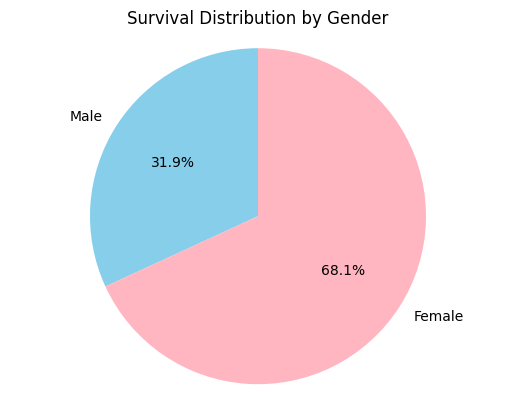

In [232]:
labels = ['Male', 'Female']
sizes = [summary['male_survived'], summary['female_survived']]
colors = ['skyblue', 'lightpink']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)

plt.title("Survival Distribution by Gender")
plt.axis('equal')
plt.show()

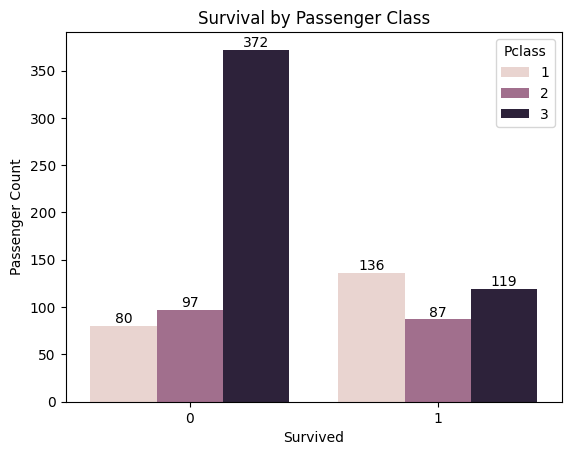

In [233]:
ax = sns.countplot(x='Survived', hue='Pclass', data=df)

for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, color='black')

plt.title("Survival by Passenger Class")
plt.xlabel("Survived")
plt.ylabel("Passenger Count")
plt.legend(title="Pclass", loc="upper right")
plt.show()

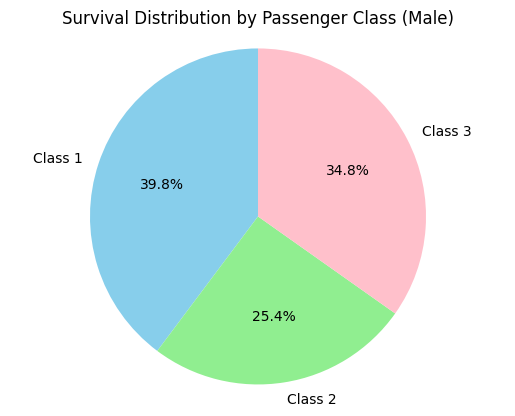

In [234]:
survival_by_class = df.groupby(['Survived', 'Pclass']).size().reset_index(name='Count')

survivor_data = survival_by_class[survival_by_class['Survived'] == 1]
labels = ['Class 1', 'Class 2', 'Class 3']
sizes = survivor_data['Count']
colors = ['skyblue', 'lightgreen', 'pink']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("Survival Distribution by Passenger Class (Male)")
plt.axis('equal')
plt.show()

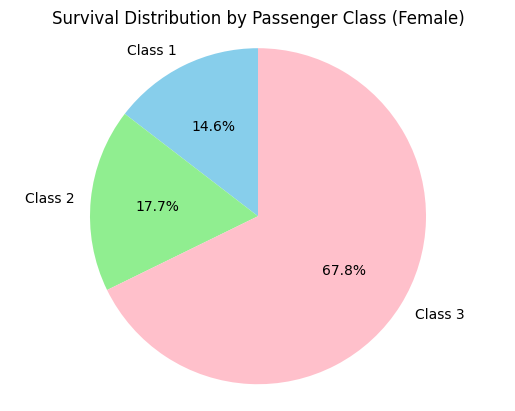

In [235]:
survival_by_class = df.groupby(['Survived', 'Pclass']).size().reset_index(name='Count')

survivor_data = survival_by_class[survival_by_class['Survived'] == 0]
labels = ['Class 1', 'Class 2', 'Class 3']
sizes = survivor_data['Count']
colors = ['skyblue', 'lightgreen', 'pink']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("Survival Distribution by Passenger Class (Female)")
plt.axis('equal')
plt.show()

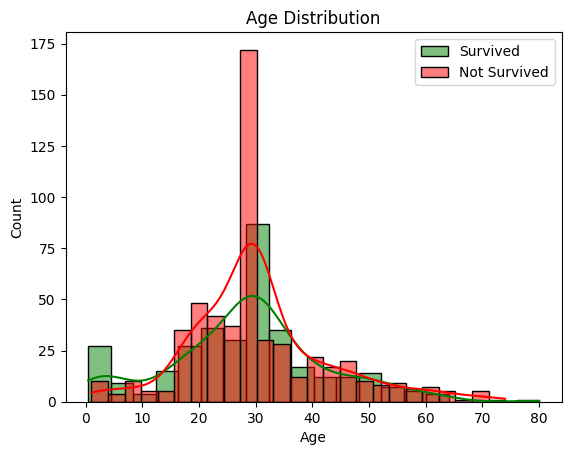

In [236]:
sns.histplot(df[df['Survived'] == 1]['Age'], kde=True, color='green', label='Survived')
sns.histplot(df[df['Survived'] == 0]['Age'], kde=True, color='red', label='Not Survived')
plt.legend()
plt.title("Age Distribution")
plt.show()

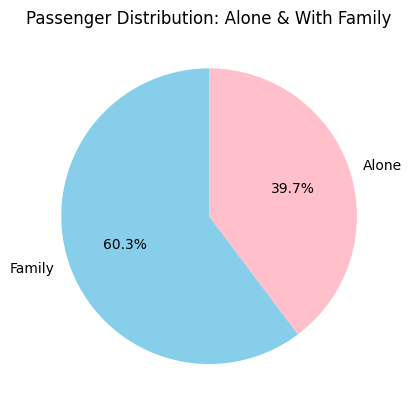

In [237]:
alone_counts = df['IsAlone'].value_counts()

labels = ['Family', 'Alone']

plt.pie(
    alone_counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue', 'pink']
)

plt.title("Passenger Distribution: Alone & With Family")
plt.show()

# 5. Train, Test and Split

In [238]:
X = df.drop(['Survived', 'IsAlone'], axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Preparing Data for ML

In [239]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Align train and test columns
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

In [240]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. Selection of Base Model

In [241]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='rbf', probability=True),
    "Random Forest": RandomForestClassifier(
        n_estimators=200, random_state=42
    ),
    "Gradient Boosting": GradientBoostingClassifier(
        random_state=42
    )
}

In [242]:
from sklearn.metrics import accuracy_score, f1_score

results = []

for name, model in models.items():

    # Use scaled data where needed
    if name in ["Logistic Regression", "KNN", "SVM"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    })

In [243]:
results_df = pd.DataFrame(results).sort_values(
    by="F1 Score", ascending=False
)

results_df

,Model,Accuracy,F1 Score
3,Random Forest,0.832402,0.785714
4,Gradient Boosting,0.815642,0.765957
1,KNN,0.815642,0.762590
0,Logistic Regression,0.798883,0.746479
2,SVM,0.804469,0.740741


# 8. Hyperparameter using CV

In [245]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [246]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

In [247]:
rf = RandomForestClassifier(
    random_state=42,
    class_weight='balanced'  # important for Titanic
)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 15],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='f1', verbose=1)

In [248]:
grid_search.best_params_

{'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 300}

In [249]:
from sklearn.metrics import accuracy_score, f1_score

best_rf = grid_search.best_estimator_

y_pred = best_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

accuracy, f1

(0.8156424581005587, 0.7692307692307693)

In [250]:
grid_search.best_score_

np.float64(0.7690087175600724)

# 9. Feature Selection and Final Model Building

In [263]:
feature_names = X_train.columns
importances = best_rf.feature_importances_

In [264]:
feat_imp = (
    pd.DataFrame({
        'feature': feature_names,
        'importance': importances
    })
    .sort_values(by='importance', ascending=False)
)

In [265]:
feat_imp.head(10)

,feature,importance
2,Sex,0.421611
4,Fare,0.169710
1,Pclass,0.123468
3,Age,0.105062
6,FamilySize,0.081346
0,PassengerId,0.074178
5,Embarked,0.024626


In [266]:
top_features = feat_imp.head(10)['feature'].tolist()

In [267]:
top_features = [
    f for f in top_features if f != 'PassengerId'
]

In [268]:
X_train_sel = X_train[top_features]
X_test_sel = X_test[top_features]

In [269]:
final_rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=5,
    min_samples_split=5,
    min_samples_leaf=1,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42
)

final_rf.fit(X_train_sel, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5,
                       min_samples_split=5, n_estimators=300, random_state=42)

In [270]:
y_pred_final = final_rf.predict(X_test_sel)

accuracy_final = accuracy_score(y_test, y_pred_final)
f1_final = f1_score(y_test, y_pred_final)

accuracy_final, f1_final

(0.8100558659217877, 0.7638888888888888)

In [271]:
from sklearn.model_selection import cross_val_score

cv_f1 = cross_val_score(
    final_rf,
    X_train_sel,
    y_train,
    scoring='f1',
    cv=5
)

cv_f1.mean(), cv_f1.std()

(np.float64(0.7429162529138751), np.float64(0.03155403753874725))

# 10. Export Model

In [272]:
import joblib

In [273]:
joblib.dump(final_rf, "rf_model.pkl")

['rf_model.pkl']

In [274]:
joblib.dump(top_features, "top_features.pkl")

['top_features.pkl']